# Predspracovanie datasetu č.17

Andrea Dická, Ján Nemčík

## Pomocne funkcie

In [1]:
from sklearn.pipeline import make_pipeline
from sklearn.base import TransformerMixin

In [2]:
def check_if_number(inputString):
    return any(char.replace('.','',1).isdigit() for char in str(inputString))

In [3]:
class Transform(TransformerMixin):
    def __init__(self, column, source, target):
        self.column = column
        self.source = source
        self.target = target
        
    def fit(self, df, y=None, **fit_params):
        return self
    
    def transform(self, df, **transform_params):
        sample = df[self.column] == self.source
        df.loc[sample, self.column] = self.target
        return df

In [4]:
from datetime import date
import datetime

def guess_date(string):
    for fmt in ["%Y/%m/%d", "%Y%m%d", "%y-%m-%d", "%Y-%m-%d", "%Y-%m-%d %H:%M:%S", "%Y-%m-%d %H %M %S", "%d/%m/%Y"]:
        try:
            return datetime.datetime.strptime(string, fmt).date()
        except ValueError:
            continue
    raise ValueError(string)

## Predspracovanie

In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.pipeline import Pipeline
import matplotlib
import statistics
import sklearn

from sklearn.pipeline import make_pipeline
from sklearn.base import TransformerMixin

data = pd.read_csv("17/train.csv", sep=',', header=None)
upraveny = pd.read_csv("17/train.csv", sep=',', header=None)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [6]:
upraveny = data.rename(columns=data.iloc[0]).drop(data.index[0])
upraveny.head()

,nan,age,sex,query on thyroxine,on antithyroid medication,thyroid surgery,I131 treatment,tumor,hypopituitary,TSH,T3 measured,T3,TT4 measured,TT4,T4U,FTI measured,FTI,TBG measured,TBG,referral source,class,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,date_of_birth,medical_info
1,0.0,53.0,M,f,f,f,f,f,f,0.3,t,1.2,t,105.0,0.91,t,115,f,?,SVHC,negative.|232,Private,90021,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,0,0,40,?,1965-01-22,"{'goitre':'f','TSH measured':'t','pregnant':'f..."
2,1.0,73.0,M,f,f,f,f,f,f,2.1,t,1.9,t,118.0,0.9,t,131,f,?,SVI,negative.|3255,Private,97411,7th-8th,4,Never-married,Machine-op-inspct,Not-in-family,Asian-Pac-Islander,0,0,45,Laos,1944-04-01,"{'goitre':'f','TSH measured':'t','pregnant':'f..."
3,2.0,73.0,F,f,f,f,f,f,f,1.6,t,2.0,t,105.0,1.17,t,89,f,?,SVI,negative.|322,Local-gov,89491,Masters,14,Divorced,Exec-managerial,Not_in_family,White,0,0,40,United-States,45-03-12,"{'goitre':'f','TSH measured':'t','pregnant':'f..."
4,3.0,24.0,M,f,f,f,f,f,f,1.3,t,1.7,t,106.0,1.0,t,106,f,?,SVHC,negative.|2462,Private,279636,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,0,0,50,Guatemala,1993-12-26,"{'goitre':'f','TSH measured':'t','pregnant':'f..."
5,4.0,25.0,F,f,f,f,f,f,f,468.0,t,0.7,t,21.0,1.1,t,19,f,?,other,negative.|3047,Private,172577,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,0,0,44,United-States,1992-08-27,"{'goitre':'f','TSH measured':'t','pregnant':'f..."


In [7]:
import json

lst = []

for a in upraveny['medical_info']:
    a = a.replace("'", '"')
    record = json.loads(a)
    lst.append(record)
    
df = pd.DataFrame(lst)
df

result = pd.concat([upraveny, df], axis=1)
upraveny = result
upraveny.head()

,nan,age,sex,query on thyroxine,on antithyroid medication,thyroid surgery,I131 treatment,tumor,hypopituitary,TSH,T3 measured,T3,TT4 measured,TT4,T4U,FTI measured,FTI,TBG measured,TBG,referral source,class,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,date_of_birth,medical_info,T4U measured,TSH measured,goitre,lithium,on thyroxine,pregnant,psych,query hyperthyroid,query hypothyroid,sick
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,t,f,f,f,f,f,f,f,f
1,0.0,53.0,M,f,f,f,f,f,f,0.3,t,1.2,t,105.0,0.91,t,115,f,?,SVHC,negative.|232,Private,90021,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,0,0,40,?,1965-01-22,"{'goitre':'f','TSH measured':'t','pregnant':'f...",t,t,f,f,f,f,f,f,f,f
2,1.0,73.0,M,f,f,f,f,f,f,2.1,t,1.9,t,118.0,0.9,t,131,f,?,SVI,negative.|3255,Private,97411,7th-8th,4,Never-married,Machine-op-inspct,Not-in-family,Asian-Pac-Islander,0,0,45,Laos,1944-04-01,"{'goitre':'f','TSH measured':'t','pregnant':'f...",t,t,f,f,f,f,f,f,f,t
3,2.0,73.0,F,f,f,f,f,f,f,1.6,t,2.0,t,105.0,1.17,t,89,f,?,SVI,negative.|322,Local-gov,89491,Masters,14,Divorced,Exec-managerial,Not_in_family,White,0,0,40,United-States,45-03-12,"{'goitre':'f','TSH measured':'t','pregnant':'f...",t,t,f,f,f,f,f,f,f,f
4,3.0,24.0,M,f,f,f,f,f,f,1.3,t,1.7,t,106.0,1.0,t,106,f,?,SVHC,negative.|2462,Private,279636,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,0,0,50,Guatemala,1993-12-26,"{'goitre':'f','TSH measured':'t','pregnant':'f...",t,t,f,f,F,f,f,f,f,f


Odstranime nepotrebne stlpce

In [8]:
upraveny = upraveny.iloc[1:]
upraveny = upraveny.drop(upraveny.columns[[0]], axis=1)
del upraveny['TBG']
del upraveny['TBG measured']
del upraveny['medical_info']
upraveny[['class','class_id']] = upraveny['class'].str.split('|',expand=True) # class triedu rozdelime na dve
upraveny.head()

,age,sex,query on thyroxine,on antithyroid medication,thyroid surgery,I131 treatment,tumor,hypopituitary,TSH,T3 measured,T3,TT4 measured,TT4,T4U,FTI measured,FTI,referral source,class,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,date_of_birth,T4U measured,TSH measured,goitre,lithium,on thyroxine,pregnant,psych,query hyperthyroid,query hypothyroid,sick,class_id
1,53.0,M,f,f,f,f,f,f,0.3,t,1.2,t,105.0,0.91,t,115,SVHC,negative.,Private,90021,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,0,0,40,?,1965-01-22,t,t,f,f,f,f,f,f,f,f,232
2,73.0,M,f,f,f,f,f,f,2.1,t,1.9,t,118.0,0.9,t,131,SVI,negative.,Private,97411,7th-8th,4,Never-married,Machine-op-inspct,Not-in-family,Asian-Pac-Islander,0,0,45,Laos,1944-04-01,t,t,f,f,f,f,f,f,f,t,3255
3,73.0,F,f,f,f,f,f,f,1.6,t,2.0,t,105.0,1.17,t,89,SVI,negative.,Local-gov,89491,Masters,14,Divorced,Exec-managerial,Not_in_family,White,0,0,40,United-States,45-03-12,t,t,f,f,f,f,f,f,f,f,322
4,24.0,M,f,f,f,f,f,f,1.3,t,1.7,t,106.0,1.0,t,106,SVHC,negative.,Private,279636,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,0,0,50,Guatemala,1993-12-26,t,t,f,f,F,f,f,f,f,f,2462
5,25.0,F,f,f,f,f,f,f,468.0,t,0.7,t,21.0,1.1,t,19,other,negative.,Private,172577,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,0,0,44,United-States,1992-08-27,t,t,f,f,F,f,f,f,f,f,3047


### Oprava formatov dat

V nasledujucej casti opravujeme a zjednocujeme formaty dat:
Napr. v stlpci referral source zjednotime sVHD a SVHD na svhd, alebo datumy narodeni zjednotime na jednotny format

#### Stlpec age

In [9]:
upraveny['age'].count()

2799

**Oprava age**:
1. Zaporne hodnoty zmenime na kladne
2. Vek > 100 dame deleno 10, vek > 1000 dame deleno 100

In [10]:
import numbers

for i, a in upraveny['age'].iteritems():
    a = float(a)    
    a = abs(a)
    a = a%100
    
    if np.isnan(a):
        a = 1000
    
    a = int(a)
    upraveny['age'][i] = a

upraveny['age'].unique()

array([53, 73, 24, 25, 60, 32, 71, 27, 64, 65, 34, 51, 62, 42, 47, 30, 75,
       35, 36, 39, 0, 72, 79, 40, 38, 48, 50, 23, 81, 43, 57, 77, 56, 59,
       67, 58, 18, 22, 55, 63, 46, 29, 74, 66, 90, 2, 70, 13, 69, 68, 17,
       31, 44, 78, 52, 89, 49, 19, 28, 21, 20, 54, 87, 26, 61, 41, 76, 15,
       37, 45, 12, 83, 16, 84, 85, 86, 33, 93, 80, 91, 1, 4, 14, 82, 8,
       94, 7, 11, 1000, 92, 88, 5, 6, 10], dtype=object)

#### Stlpec referral source

In [11]:
upraveny["referral source"].unique()

array(['SVHC', 'SVI', 'other', 'Other', 'sVHC', 'sVI', 'STMW', 'SVHD',
       'sTMW', 'sVHD'], dtype=object)

In [12]:
upraveny["referral source"].value_counts()

other    1464
SVI       698
SVHC      247
Other     168
STMW       83
sVI        73
sVHC       28
SVHD       28
sTMW        8
sVHD        3
Name: referral source, dtype: int64

In [13]:
ppl = Pipeline([
              ('name1', Transform('referral source', 'SVHC', 'svhc')),
              ('name2', Transform('referral source', 'SVI', 'svi')),
              ('name3', Transform('referral source', 'Other', 'other')),
              ('name4', Transform('referral source', 'sVHC', 'svhc')),
              ('name5', Transform('referral source', 'sVI', 'svi')),
              ('name6', Transform('referral source', 'STMW', 'stmw')),
              ('name7', Transform('referral source', 'SVHD', 'svhd')),
              ('name8', Transform('referral source', 'sTMW', 'stmw')),
              ('name9', Transform('referral source', 'sVHD', 'svhd')),
      ])

model = ppl.fit(upraveny)
upraveny = model.transform(upraveny)
upraveny['referral source'].unique()

array(['svhc', 'svi', 'other', 'stmw', 'svhd'], dtype=object)

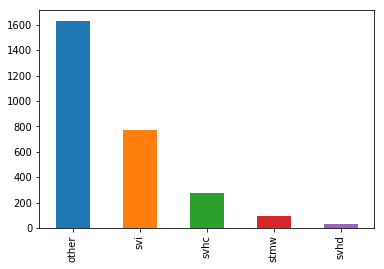

In [14]:
upraveny['referral source'].value_counts().plot(kind='bar')

#### Stlpec relationship

In [15]:
upraveny['relationship'].unique()

array([' Husband', ' Not-in-family', ' Not_in_family', ' Wife',
       ' Own-child', ' Unmarried', ' Other-relative', ' Other_relative',
       ' Own_child'], dtype=object)

In [16]:
for i, rel in upraveny['relationship'].iteritems():
    rel = rel.strip()
    upraveny['relationship'][i] = rel

line = Pipeline([
              ('r1', Transform('relationship', 'Not_in_family', 'Not-in-family')),
              ('r2', Transform('relationship', 'Own_child', 'Own-child')),
              ('r3', Transform('relationship', 'Other_relative', 'Other-relative')),
      ])

model = line.fit(upraveny)
upraveny = model.transform(upraveny)

upraveny['relationship'].unique()

array(['Husband', 'Not-in-family', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

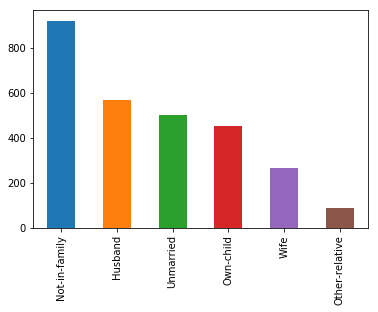

In [17]:
upraveny['relationship'].value_counts().plot(kind='bar')

#### Stlpec workclass

In [18]:
upraveny['workclass'].unique()

array([' Private', ' Local-gov', ' Self-emp-not-inc', ' ?', ' State-gov',
       ' Self-emp-inc', ' Federal-gov', ' Without-pay'], dtype=object)

In [19]:
for i,work in upraveny['workclass'].iteritems():
    work = work.strip()
    upraveny['workclass'][i] = work

upraveny['workclass'].unique()

array(['Private', 'Local-gov', 'Self-emp-not-inc', '?', 'State-gov',
       'Self-emp-inc', 'Federal-gov', 'Without-pay'], dtype=object)

#### Stlpec race

Odstranenie zaciatocnych bielych znakov

In [20]:
upraveny['race'].unique()

array([' White', ' Asian-Pac-Islander', ' Black', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [21]:
for i,race in upraveny['race'].iteritems():
    race = race.strip()
    upraveny['race'][i] = race

upraveny['race'].unique()

array(['White', 'Asian-Pac-Islander', 'Black', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

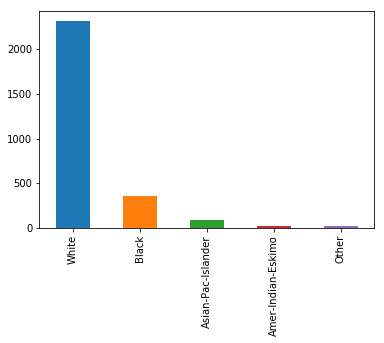

In [22]:
upraveny['race'].value_counts().plot(kind='bar')

#### Stlpec native-country

Odstranenie zaciatocnych bielych znakov

In [23]:
upraveny['native-country'].unique()

array([' ?', ' Laos', ' United-States', ' Guatemala', ' Puerto-Rico',
       ' Mexico', ' Ireland', ' Cuba', ' Honduras', ' Italy',
       ' Dominican-Republic', ' Peru', ' Canada', ' Portugal',
       ' Philippines', ' South', ' Jamaica', ' India', ' France',
       ' Germany', ' England', ' Outlying-US(Guam-USVI-etc)', ' Poland',
       ' Ecuador', ' Columbia', ' China', ' El-Salvador', ' Cambodia',
       ' Japan', ' Thailand', ' Haiti', ' Iran', ' Hungary', ' Vietnam',
       ' Yugoslavia', ' Taiwan', ' Nicaragua', ' Hong', ' Scotland',
       ' Greece'], dtype=object)

In [24]:
for i,race in upraveny['native-country'].iteritems():
    race = race.strip() #odstranime biele znaky na zaciatku stringov
    upraveny['native-country'][i] = race

upraveny['native-country'].unique()

array(['?', 'Laos', 'United-States', 'Guatemala', 'Puerto-Rico', 'Mexico',
       'Ireland', 'Cuba', 'Honduras', 'Italy', 'Dominican-Republic',
       'Peru', 'Canada', 'Portugal', 'Philippines', 'South', 'Jamaica',
       'India', 'France', 'Germany', 'England',
       'Outlying-US(Guam-USVI-etc)', 'Poland', 'Ecuador', 'Columbia',
       'China', 'El-Salvador', 'Cambodia', 'Japan', 'Thailand', 'Haiti',
       'Iran', 'Hungary', 'Vietnam', 'Yugoslavia', 'Taiwan', 'Nicaragua',
       'Hong', 'Scotland', 'Greece'], dtype=object)

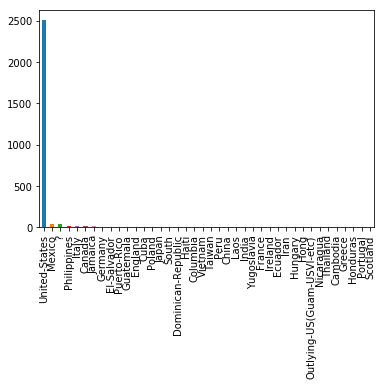

In [25]:
upraveny['native-country'].value_counts().plot(kind='bar')

#### Stlpec date_of_birth

Zjednotenie formatov datumov

In [26]:
for i,date in upraveny['date_of_birth'].iteritems():
    
    if(str(date) != 'nan'):        
        aa = guess_date(str(date))
        upraveny['date_of_birth'][i] = aa

upraveny['date_of_birth'].head(15)

1     1965-01-22
2     1944-04-01
3     2045-03-12
4     1993-12-26
5     1992-08-27
6     1958-02-13
7     1985-07-26
8     1946-06-21
9     1990-06-02
10    1953-06-30
11    1952-04-08
12    1984-02-08
13    1966-08-06
14    1994-03-08
15    1956-03-19
Name: date_of_birth, dtype: object

#### Slpec on thyroxine

Uprava na jednotny format (t,f)

In [27]:
upraveny['on thyroxine'].unique()

array(['f', 'F', 't', 'T', 'TRUE', 'FALSE', nan], dtype=object)

In [28]:
line = Pipeline([
              ('ot1', Transform('on thyroxine', 'F', 'f')),
              ('ot2', Transform('on thyroxine', 'T', 't')),
              ('ot3', Transform('on thyroxine', 'FALSE', 'f')),
              ('ot4', Transform('on thyroxine', 'TRUE', 't')),
      ])

model = line.fit(upraveny)
upraveny = model.transform(upraveny)

upraveny['on thyroxine'].unique()

array(['f', 't', nan], dtype=object)

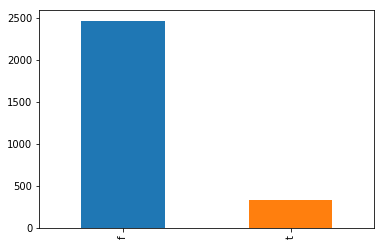

In [29]:
upraveny['on thyroxine'].value_counts().plot(kind='bar')

## Chybajuce a vychylene hodnoty v numerickych stlpcoch

V stlpci **age** sa v testovacich datach nachadza iba 1 udaj, ktory chyba a ktory nevieme nahradit podla datumu narodenia, ktory tiez chyba. Rozhodli sme sa ho nahradit priemernym vekom

In [30]:
from datetime import date
from datetime import datetime

def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

for i, age in upraveny['age'].iteritems():
    if age == 1000 and not np.isnan(upraveny['date_of_birth'][i]):        
        datetime_object = datetime.strptime(str(upraveny['date_of_birth'][i]), '%Y-%m-%d')
        upraveny['age'][i] = calculate_age(datetime_object)
    elif age == 1000 and np.isnan(upraveny['date_of_birth'][i]):
        #vymazat ten riadok ked nevieme chybajuci vek doplnit na zaklade datumu narodenia
        #upraveny = upraveny.drop(i)
        #upraveny = upraveny.reset_index()
        pass


In [31]:
upraveny['age'].head(1500)

1         53
2         73
3         73
4         24
5         25
6         60
7         32
8         71
9         27
10        64
11        65
12        34
13        51
14        24
15        62
16        53
17        34
18        42
19        47
20        30
21        75
22        35
23        36
24        64
25        39
        ... 
1476      64
1477       0
1478      27
1479      73
1480      60
1481      70
1482      76
1483      75
1484      62
1485      51
1486       0
1487      39
1488      24
1489       0
1490      85
1491      55
1492      83
1493      53
1494      53
1495       0
1496      44
1497      60
1498    1000
1499      74
1500      36
Name: age, Length: 1500, dtype: object

In [32]:
upraveny['age'].count()

2800

### TSH a TSH measured

In [33]:
upraveny['TSH'].unique()

array(['0.3', '2.1', '1.6', '1.3', '468.0', '1.1', nan, '2.4', '0.02',
       '3.5', '2.5', '2.3', '1.9', '1.8', '0.85', '0.2', '7.2', '0.72',
       '2.6', '7.3', '0.05', '2.8', '1.4', '0.03', '76.0', '0.9', '0.5',
       '1.2', '2.0', '4.1', '11.0', '1.5', '0.4', '60.0', '0.8', '5.2',
       '4.8', '0.1', '2.7', '4.4', '0.015', '4.7', '0.025', '28.0',
       '0.065', '5.1', '0.68', '0.15', '0.6', '5.8', '3.0', '6.3',
       '0.045', '0.75', '0.88', '1.7', '0.84', '0.74', '41.0', '3.9',
       '0.97', '0.41', '8.6', '4.9', '0.92', '46.0', '9.4', '0.91', '2.2',
       '16.0', '38.0', '6.5', '0.86', '0.01', '0.005', '0.31', '0.32',
       '0.25', '1.0', '0.58', '478.0', '0.19', '0.035', '0.71', '0.7',
       '0.87', '0.35', '4.2', '5.0', '5.4', '3.7', '4.5', '13.0', '8.3',
       '2.9', '472.0', '55.0', '14.0', '3.8', '0.08', '0.29', '0.52',
       '0.46', '0.04', '0.93', '61.0', '4.0', '35.0', '7.1', '183.0',
       '0.76', '160.0', '0.95', '5.5', '0.09', '6.4', '9.9', '7.5',
       '3

In [34]:
upraveny['TSH measured'].value_counts()

t    2515
f     284
Name: TSH measured, dtype: int64

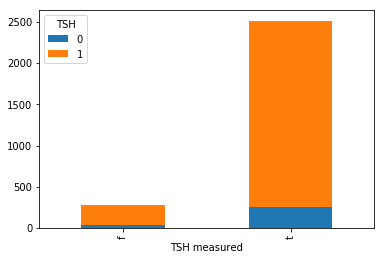

In [35]:
lst = upraveny['TSH'].copy()

for i,a in upraveny['TSH'].iteritems():
    if float(a) > 0.0:
        lst[i] = 1
    else:
        lst[i] = 0
        
pd.crosstab(index=upraveny['TSH measured'], columns=lst).plot.bar(stacked=True)

Z grafu vidime, ze pri TSH a TSH measured mame nekonzistentne data - tam, kde sme zaznamenali, ze TSH sa nemeralo (TSH measured bolo false), tak v stlpci TSH predsa len nejaka namerana hodnota bola a naopak. Potrebujeme to opravit

In [36]:
for i, value in upraveny['TSH'].iteritems():
    if float(value) > 0:
        upraveny['TSH measured'][i] = 't'
    else:
        upraveny['TSH measured'][i] = 'f'

lst = upraveny['TSH'].copy()

for i,a in upraveny['TSH'].iteritems():
    if float(a) > 0.0:
        lst[i] = 1
    else:
        lst[i] = 0

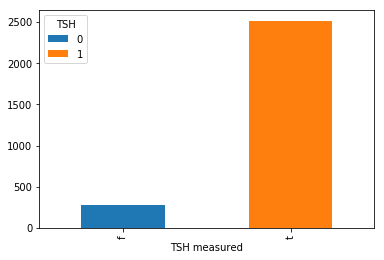

In [37]:
pd.crosstab(index=upraveny['TSH measured'], columns=lst).plot.bar(stacked=True)

### T3 a T3 measured

In [38]:
upraveny['T3'].unique()

array(['1.2', '1.9', '2.0', '1.7', '0.7', nan, '5.3', '1.8', '2.5', '2.2',
       '2.1', '2.3', '5.0', '1.5', '3.8', '3.0', '1.4', '2.6', '1.6',
       '0.9', '0.5', '2.9', '2.7', '3.1', '1.1', '2.8', '0.6', '2.4',
       '0.2', '3.4', '1.3', '0.4', '1.0', '3.7', '4.3', '3.3', '0.05',
       '3.6', '4.8', '4.2', '4.6', '0.8', '6.2', '3.9', '4.1', '0.3',
       '5.4', '3.2', '5.5', '4.0', '7.1', '3.5', '0.1', '4.4', '7.0',
       '4.5', '7.3', '5.2', '10.6', '6.7', '5.1', '4.9', '4.7', '6.1',
       '6.0'], dtype=object)

In [39]:
upraveny['T3 measured'].unique()

array(['t', 'f'], dtype=object)

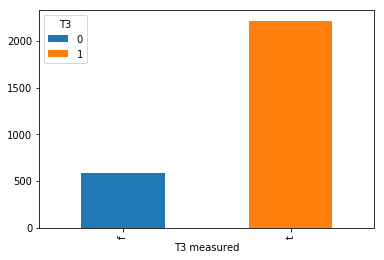

In [40]:
lstT3 = upraveny['T3'].copy()

for i,a in upraveny['T3'].iteritems():
    if float(a) > 0.0:
        lstT3[i] = 1
    else:
        lstT3[i] = 0
        
pd.crosstab(index=upraveny['T3 measured'], columns=lstT3).plot.bar(stacked=True)

In [41]:
# tu to netreba opravovat

### TT4 a TT4 measured

In [42]:
upraveny['TT4'].unique()

array(['105.0', '118.0', '106.0', '21.0', '90.0', '134.0', '133.0',
       '272.0', '72.0', '137.0', '121.0', '74.0', '91.0', '92.0', '103.0',
       '223.0', '123.0', '89.0', '85.0', '140.0', '125.0', '117.0',
       '111.0', '109.0', '87.0', '93.0', '122.0', '131.0', '95.0',
       '150.0', '83.0', '22.0', '136.0', '102.0', '78.0', '151.0',
       '110.0', '152.0', '107.0', nan, '183.0', '14.0', '80.0', '187.0',
       '169.0', '82.0', '97.0', '94.0', '71.0', '96.0', '145.0', '33.0',
       '129.0', '101.0', '162.0', '159.0', '100.0', '130.0', '119.0',
       '115.0', '48.0', '62.0', '116.0', '81.0', '149.0', '84.0', '59.0',
       '86.0', '144.0', '63.0', '104.0', '56.0', '189.0', '164.0', '68.0',
       '37.0', '88.0', '198.0', '252.0', '132.0', '99.0', '77.0', '38.0',
       '45.0', '124.0', '142.0', '98.0', '160.0', '120.0', '76.0',
       '154.0', '113.0', '157.0', '32.0', '54.0', '158.0', '430.0',
       '213.0', '139.0', '210.0', '46.0', '34.0', '168.0', '255.0',
       '79.0'

In [43]:
upraveny['TT4 measured'].unique()

array(['t', 'f'], dtype=object)

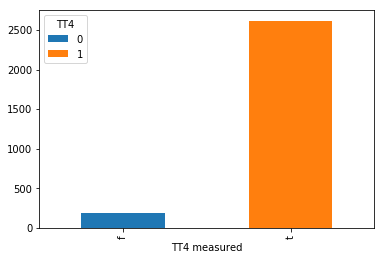

In [44]:
lstTT4 = upraveny['TT4'].copy()

for i,a in upraveny['TT4'].iteritems():
    if float(a) > 0.0:
        lstTT4[i] = 1
    else:
        lstTT4[i] = 0
        
pd.crosstab(index=upraveny['TT4 measured'], columns=lstTT4).plot.bar(stacked=True)

In [45]:
# aj tt4 je pekne

### Stlpec T4U a T4U measured

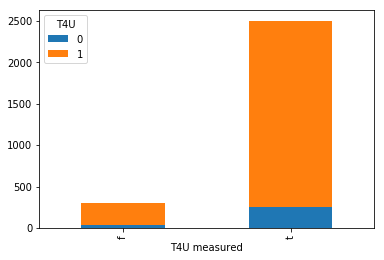

In [46]:
lstT4U = upraveny['T4U'].copy()

for i,a in upraveny['T4U'].iteritems():
    if float(a) > 0.0:
        lstT4U[i] = 1
    else:
        lstT4U[i] = 0
        
pd.crosstab(index=upraveny['T4U measured'], columns=lstT4U).plot.bar(stacked=True)

In [47]:
for i, value in upraveny['T4U'].iteritems():
    if float(value) > 0:
        upraveny['T4U measured'][i] = 't'
    else:
        upraveny['T4U measured'][i] = 'f'

lstT4U = upraveny['T4U'].copy()

for i,a in upraveny['T4U'].iteritems():
    if float(a) > 0.0:
        lstT4U[i] = 1
    else:
        lstT4U[i] = 0

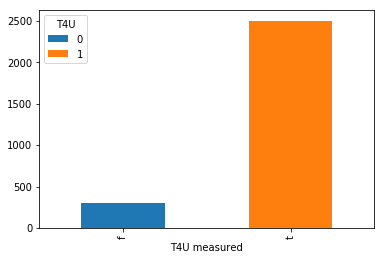

In [48]:
pd.crosstab(index=upraveny['T4U measured'], columns=lstT4U).plot.bar(stacked=True)

### Stlpec FTI a FTI measured

In [49]:
upraveny['FTI'].unique() # treba opravit ? na 0

array(['115', '131', '89', '106', '19', '84', '104', '123', '281', '129',
       '94', '81', '98', '97', '111', '88', '85', '90', '121', '169',
       '105', '122', '144', '145', '69', '99', '119', '116', '92', '114',
       '86', '153', '127', '93', '?', '141', '13', '110', '197', '143',
       '125', '63', '80', '107', '155', '47', '136', '117', '103', '146',
       '112', '166', '87', '64', '91', '113', '95', '41', '109', '79',
       '83', '108', '102', '124', '120', '66', '49', '137', '118', '151',
       '176', '67', '50', '198', '132', '222', '152', '71', '149', '100',
       '101', '73', '34', '96', '82', '133', '140', '170', '172', '156',
       '154', '395', '190', '77', '51', '78', '161', '29', '171', '244',
       '43', '74', '62', '134', '165', '139', '195', '11', '75', '157',
       '46', '8.9', '138', '247', '159', '204', '167', '168', '160',
       '126', '163', '148', '135', '76', '70', '72', '57', '128', '224',
       '54', '253', '2', '232', '174', '158', '173', '130

In [50]:
fti = Pipeline([
              ('ot1', Transform('FTI', '?', '0')),
      ])

model = fti.fit(upraveny)
upraveny = model.transform(upraveny)

upraveny['FTI'].unique()

array(['115', '131', '89', '106', '19', '84', '104', '123', '281', '129',
       '94', '81', '98', '97', '111', '88', '85', '90', '121', '169',
       '105', '122', '144', '145', '69', '99', '119', '116', '92', '114',
       '86', '153', '127', '93', '0', '141', '13', '110', '197', '143',
       '125', '63', '80', '107', '155', '47', '136', '117', '103', '146',
       '112', '166', '87', '64', '91', '113', '95', '41', '109', '79',
       '83', '108', '102', '124', '120', '66', '49', '137', '118', '151',
       '176', '67', '50', '198', '132', '222', '152', '71', '149', '100',
       '101', '73', '34', '96', '82', '133', '140', '170', '172', '156',
       '154', '395', '190', '77', '51', '78', '161', '29', '171', '244',
       '43', '74', '62', '134', '165', '139', '195', '11', '75', '157',
       '46', '8.9', '138', '247', '159', '204', '167', '168', '160',
       '126', '163', '148', '135', '76', '70', '72', '57', '128', '224',
       '54', '253', '2', '232', '174', '158', '173', '130

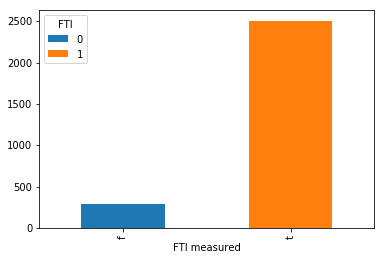

In [51]:
lstFTI = upraveny['FTI'].copy()

for i,a in upraveny['FTI'].iteritems():
    if float(a) > 0.0:
        lstFTI[i] = 1
    else:
        lstFTI[i] = 0
        
pd.crosstab(index=upraveny['FTI measured'], columns=lstFTI).plot.bar(stacked=True)

In [52]:
#fti je ok

### TSH, T4U, FTI, TT4 a T3

#### TSH

In [53]:
upraveny['TSH'].count() #chyba nam 284 nameranych hodnot, aby sme mohli spravit s ostatnymi korelacie

2516

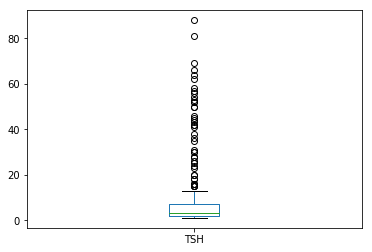

In [54]:
upraveny['TSH'].value_counts().plot(kind='box')

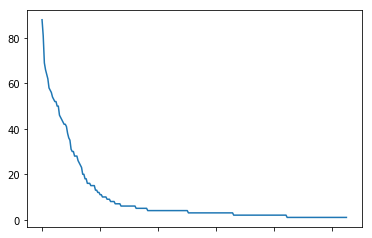

In [55]:
upraveny['TSH'].value_counts().plot(kind='line')

In [56]:
for i,a in upraveny['TSH'].iteritems():
    upraveny['TSH'][i] = round(float(a),2)
    
upraveny['TSH'].min()

0.01

Text(0.5,1,'index: logTSH (log transform)')

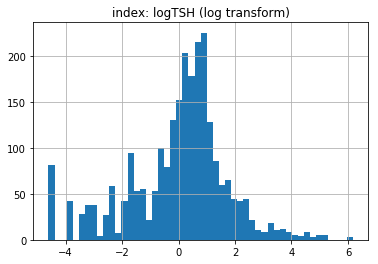

In [57]:
logTSH = []
for i,a in upraveny['TSH'].iteritems():
    logTSH.append(float(a))

transformed = np.log(logTSH) #logaritmus je pre kladne cisla, tak kedze najmensie je -1,52.. tak si to posuniem o dva,aby to bolo kladne
pom = pd.Series(transformed).hist(bins=50)
pom.set_title("index: logTSH (log transform)")

Doplnime chybajuce hodnoty **medianom**

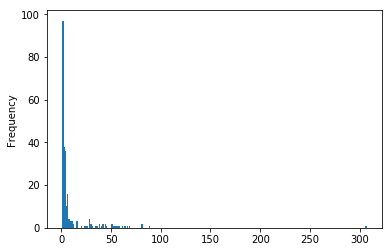

In [58]:
import statistics

median = statistics.median(upraveny['TSH'].value_counts())

upraveny['TSH'] = upraveny['TSH'].fillna(median) #doplnenie chybajucich hodnot priemerom

upraveny['TSH'].value_counts().plot(kind='hist', bins=250) #power law

In [59]:
median

3.0

Text(0.5,1,'index: logTSH_edited (log transform)')

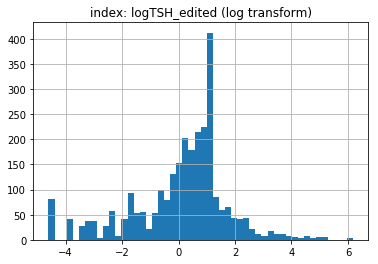

In [60]:
logTSH_edited = []
for i,a in upraveny['TSH'].iteritems():
    logTSH_edited.append(round(float(a),2))

transformed = np.log(logTSH_edited)
pom = pd.Series(transformed).hist(bins=50)
pom.set_title("index: logTSH_edited (log transform)")

#### T4U

In [61]:
upraveny['T4U'].count() # tu nam chyba 297 dat

2503

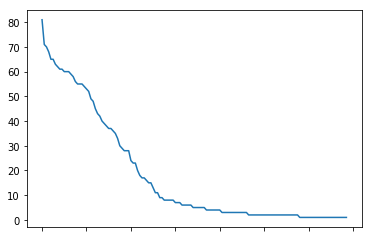

In [62]:
upraveny['T4U'].value_counts().plot(kind='line')

In [63]:
def k_n_n(array):
    iterator = 1
    for value in array:
        mean_lst = []
        if not check_if_number(value):
            if iterator / 5 == 0:
                for a in range(1, 10):
                    mean_lst.append(array[iterator + a])
            elif len(array) - iterator <= 5:
                for a in range(1, 10):
                    mean_lst.append(array[iterator - a])
            else:
                for a in range(1, 5):
                    mean_lst.append(array[iterator - a])
                    mean_lst.append(array[iterator + a])

            final = []
            for a in mean_lst:
                if check_if_number(a):
                    final.append(float(a))
                
            temp = np.mean(final)
            temp = float("{0:.2f}".format(temp))
            array[iterator] = temp
        
        iterator += 1
    
    return array

Text(0.5,1,'index: logT4U (log transform)')

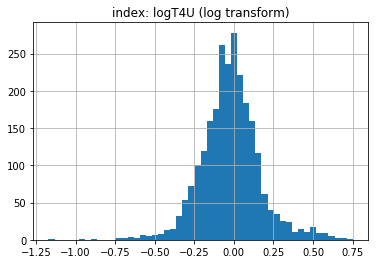

In [64]:
logT4U = []
for i,a in upraveny['T4U'].iteritems():
    logT4U.append(float(a))

transformed = np.log(logT4U) #logaritmus je pre kladne cisla, tak kedze najmensie je -1,52.. tak si to posuniem o dva,aby to bolo kladne
pom = pd.Series(transformed).hist(bins=50)
pom.set_title("index: logT4U (log transform)")

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


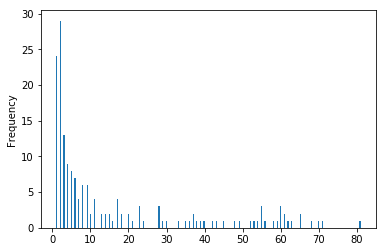

In [65]:
upraveny['T4U'] = k_n_n(upraveny['T4U'])

upraveny['T4U'].value_counts().plot(kind='hist', bins=250) #power law

Text(0.5,1,'index: logT4U (log transform)')

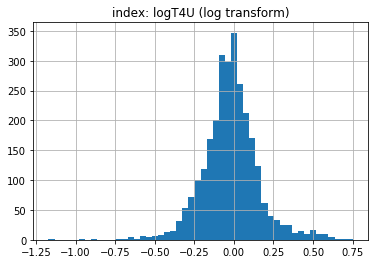

In [66]:
logT4U_edited = []
for i,a in upraveny['T4U'].iteritems():
    logT4U_edited .append(float(a))

transformed = np.log(logT4U_edited ) #logaritmus je pre kladne cisla, tak kedze najmensie je -1,52.. tak si to posuniem o dva,aby to bolo kladne
pom = pd.Series(transformed).hist(bins=50)
pom.set_title("index: logT4U (log transform)")

#### FTI

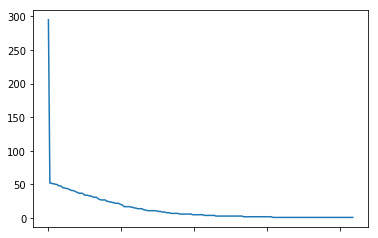

In [67]:
upraveny['FTI'].value_counts().plot(kind='line')

In [68]:
logFTI = []
for i,a in upraveny['FTI'].iteritems():
    if float(a) > 0.0:
        logFTI.append(float(a))
    

min(logFTI)

2.0

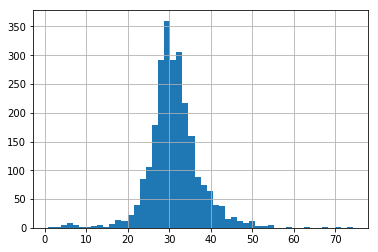

In [69]:
from scipy.stats import boxcox
transformed, att = boxcox(logFTI)
pom = pd.Series(transformed).hist(bins=50)

Doplnime chybajuce data **medianom** a vykreslime znova graf

In [70]:
import statistics

median = statistics.median(upraveny['FTI'].value_counts())

upraveny['FTI'] = upraveny['FTI'].fillna(median) #doplnenie chybajucich hodnot priemerom

In [71]:
logFTI_edited = []
for i,a in upraveny['FTI'].iteritems():
    if float(a) > 0.0:
        logFTI_edited.append(float(a))

In [72]:
upraveny['TSH'].count()

2800

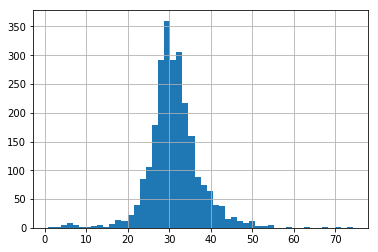

In [73]:
from scipy.stats import boxcox
transformed, att = boxcox(logFTI_edited)
pom = pd.Series(transformed).hist(bins=50)

#### TT4

In [74]:
upraveny['TT4'].count() #chyba 184 zaznamov

2616

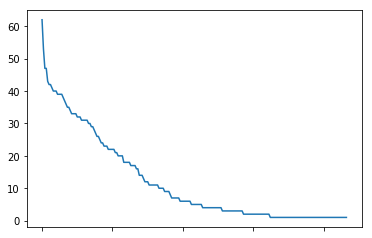

In [75]:
upraveny['TT4'].value_counts().plot(kind='line')

In [76]:
logTT4 = []
for i,a in upraveny['TT4'].iteritems():
    if float(a) > 0.0:
        logTT4.append(float(a))
    

min(logTT4)

2.0

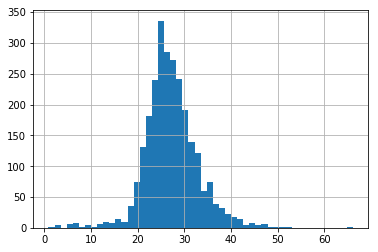

In [77]:
from scipy.stats import boxcox
transformed, att = boxcox(logTT4)
pom = pd.Series(transformed).hist(bins=50)

In [78]:
import statistics

median = statistics.median(upraveny['TT4'].value_counts())

upraveny['TT4'] = upraveny['TT4'].fillna(median) 

In [79]:
logTT4_edited = []
for i,a in upraveny['TT4'].iteritems():
    if float(a) > 0.0:
        logTT4_edited.append(float(a))

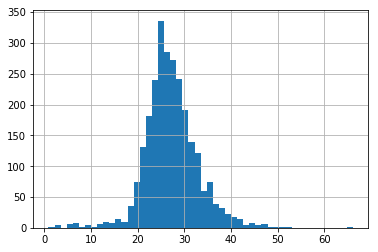

In [80]:
from scipy.stats import boxcox
transformed, att = boxcox(logTT4)
pom = pd.Series(transformed).hist(bins=50)

#### T3

In [81]:
upraveny['T3'].count() #chyba 785 dat

2215

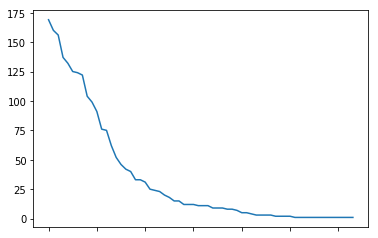

In [82]:
upraveny['T3'].value_counts().plot(kind='line')

In [83]:
logT3 = []
for i,a in upraveny['T3'].iteritems():
    if float(a) > 0.0:
        logT3.append(float(a))
    

min(logT3)

0.05

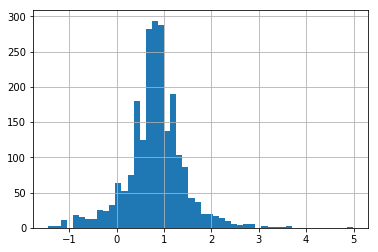

In [84]:
from scipy.stats import boxcox
transformed, att = boxcox(logT3)
pom = pd.Series(transformed).hist(bins=50)

In [85]:
upraveny['T3'].head(1500)

1       1.2
2       1.9
3       2.0
4       1.7
5       0.7
6       NaN
7       NaN
8       1.9
9       5.3
10      1.8
11      NaN
12      2.5
13      2.2
14      2.1
15      2.3
16      2.0
17      5.0
18      2.1
19      1.2
20      1.8
21      1.5
22      3.8
23      3.0
24      1.4
25      3.0
       ... 
1476    NaN
1477    NaN
1478    2.3
1479    2.1
1480    2.2
1481    2.6
1482    2.6
1483    1.5
1484    2.0
1485    NaN
1486    0.5
1487    2.4
1488    NaN
1489    1.6
1490    1.1
1491    2.1
1492    2.1
1493    1.7
1494    NaN
1495    2.4
1496    2.3
1497    1.8
1498    1.5
1499    2.6
1500    1.6
Name: T3, Length: 1500, dtype: object

In [86]:
#upraveny['T3'] = k_n_n(upraveny['T3'])

In [87]:
logT3_edited = []
for i,a in upraveny['T3'].iteritems():
    if float(a) > 0.0:
        logT3_edited.append(float(a))

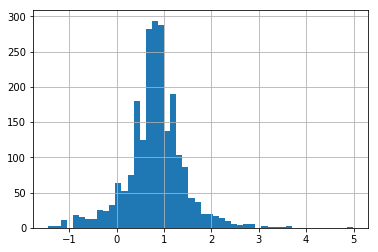

In [88]:
from scipy.stats import boxcox
transformed, att = boxcox(logT3_edited)
pom = pd.Series(transformed).hist(bins=50)

## Korelacie TSH, FTI, TT4, T4U, T3

In [89]:
objFTI = upraveny['FTI'].copy()
objTSH = upraveny['TSH'].copy()
objTT4 = upraveny['TT4'].copy()
objT3 = upraveny['T3'].copy()
objT4U = upraveny['T4U'].copy()

for i,a in upraveny['FTI'].iteritems():
    objFTI[i] = round(float(a),2)
    
for i,a in upraveny['TSH'].iteritems():
    objTSH[i] = round(float(a),2)

for i,a in upraveny['TT4'].iteritems():
    objTT4[i] = round(float(a),2)

for i,a in upraveny['T3'].iteritems():
    objT3[i] = round(float(a),2)

for i,a in upraveny['T4U'].iteritems():
    objT4U[i] = round(float(a),2)

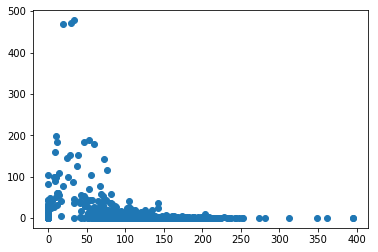

In [90]:
plt.scatter(objFTI,objTSH)

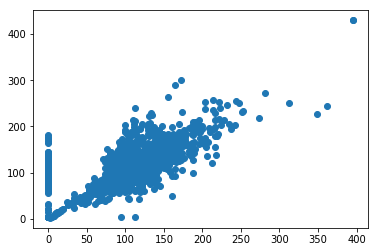

In [91]:
plt.scatter(objFTI,objTT4)

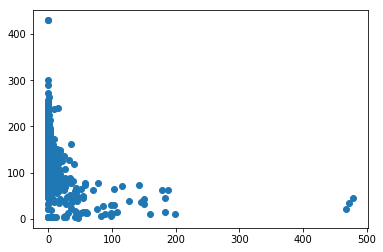

In [92]:
plt.scatter(objTSH,objTT4)

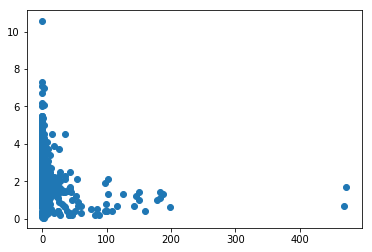

In [93]:
plt.scatter(objTSH,objT3)

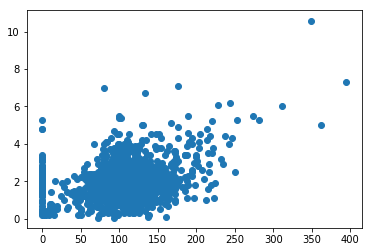

In [94]:
plt.scatter(objFTI,objT3)

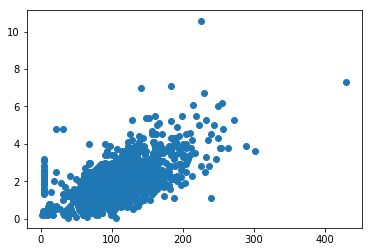

In [95]:
plt.scatter(objTT4,objT3)

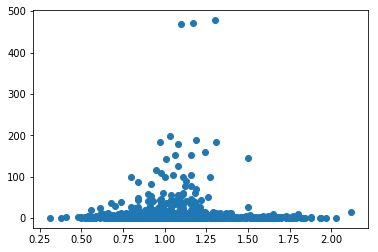

In [96]:
plt.scatter(objT4U,objTSH)

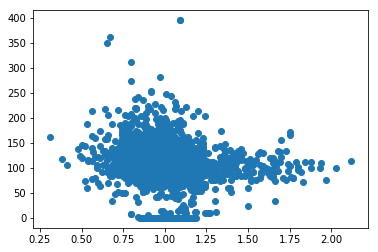

In [97]:
plt.scatter(objT4U,objFTI)

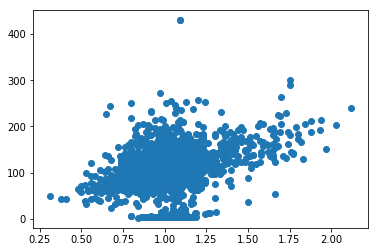

In [98]:
plt.scatter(objT4U,objTT4)

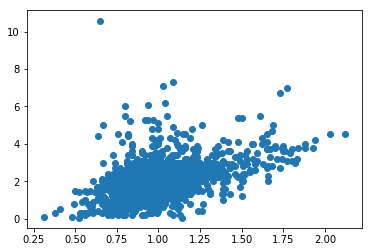

In [99]:
plt.scatter(objT4U,objT3)

### Korelacie TSH, FTI, T4U, T3 a TT4 s atributom class, ktory mame predikovat

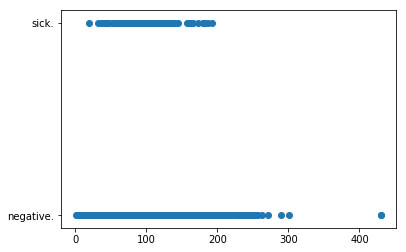

In [100]:
plt.scatter(objTT4,upraveny['class'])

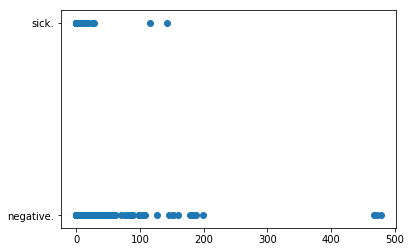

In [101]:
plt.scatter(objTSH,upraveny['class'])

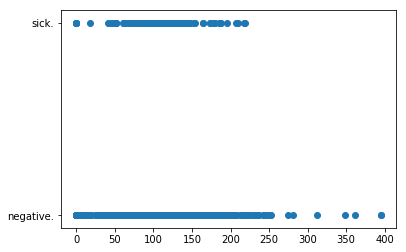

In [102]:
plt.scatter(objFTI,upraveny['class'])

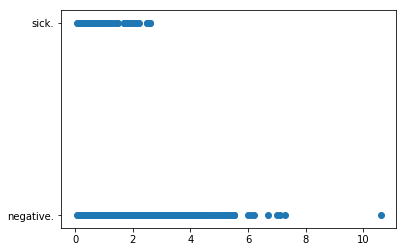

In [103]:
plt.scatter(objT3,upraveny['class'])

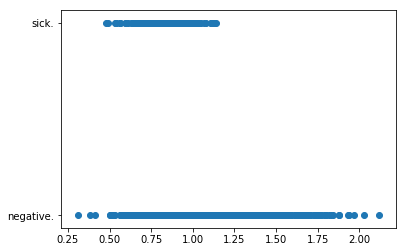

In [104]:
plt.scatter(objT4U,upraveny['class'])

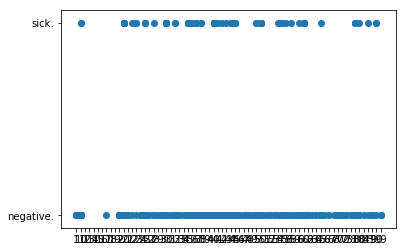

In [105]:
plt.scatter(upraveny['hours-per-week'],upraveny['class'])

### Korelacie query on thyroxine, on antithyroid medication, thyroid surgery, I131 treatment, tumor, hypopituitary s atributom class, ktory mame predikovat

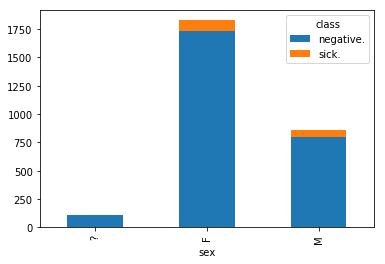

In [106]:
pd.crosstab(index=upraveny['sex'], columns=upraveny['class']).plot.bar(stacked=True)

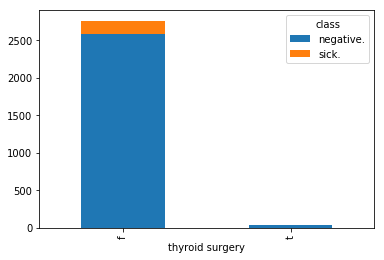

In [107]:
pd.crosstab(index=upraveny['thyroid surgery'], columns=upraveny['class']).plot.bar(stacked=True)

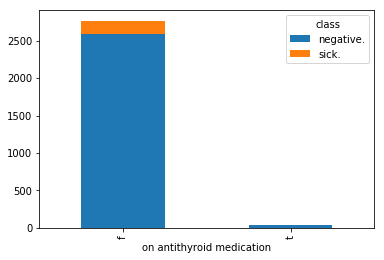

In [108]:
pd.crosstab(index=upraveny['on antithyroid medication'], columns=upraveny['class']).plot.bar(stacked=True)

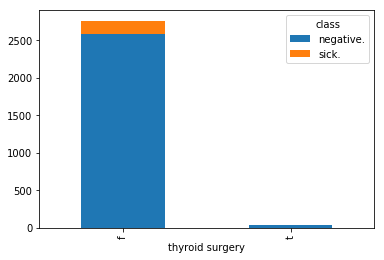

In [109]:
pd.crosstab(index=upraveny['thyroid surgery'], columns=upraveny['class']).plot.bar(stacked=True)

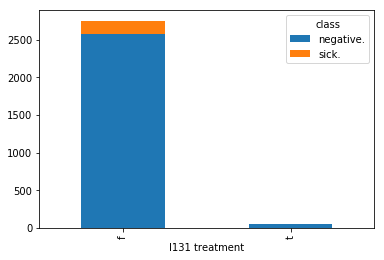

In [110]:
pd.crosstab(index=upraveny['I131 treatment'], columns=upraveny['class']).plot.bar(stacked=True)

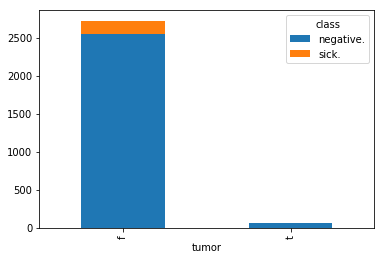

In [111]:
pd.crosstab(index=upraveny['tumor'], columns=upraveny['class']).plot.bar(stacked=True)

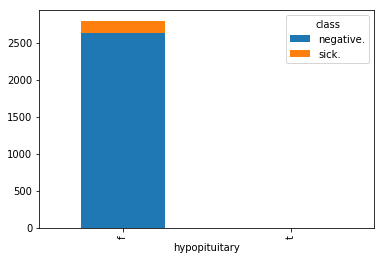

In [112]:
pd.crosstab(index=upraveny['hypopituitary'], columns=upraveny['class']).plot.bar(stacked=True)

### Korelacie goitre, lithium, on thyroxine, pregnant, psych, query hyperthyroid, query hypothyroid, sick s atributom class, ktory mame predikovat

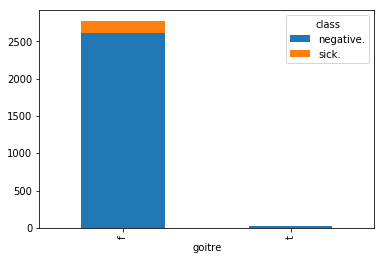

In [113]:
pd.crosstab(index=upraveny['goitre'], columns=upraveny['class']).plot.bar(stacked=True)

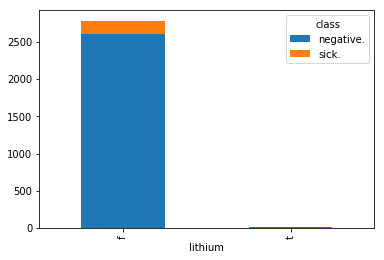

In [114]:
pd.crosstab(index=upraveny['lithium'], columns=upraveny['class']).plot.bar(stacked=True)

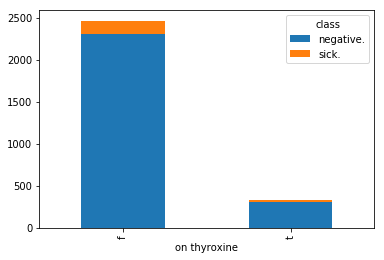

In [115]:
pd.crosstab(index=upraveny['on thyroxine'], columns=upraveny['class']).plot.bar(stacked=True)

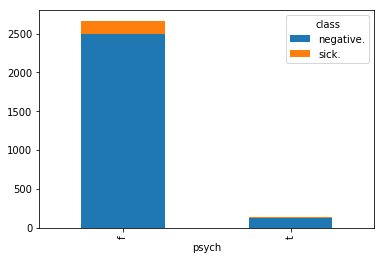

In [116]:
pd.crosstab(index=upraveny['psych'], columns=upraveny['class']).plot.bar(stacked=True)

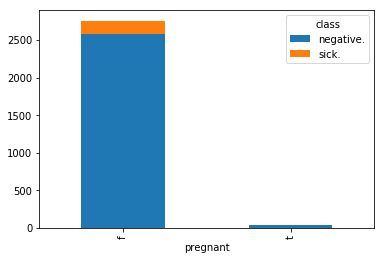

In [117]:
pd.crosstab(index=upraveny['pregnant'], columns=upraveny['class']).plot.bar(stacked=True)

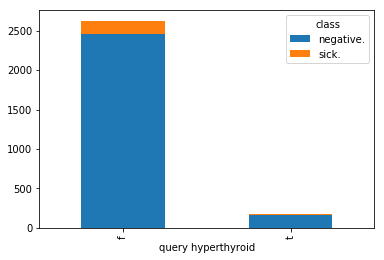

In [118]:
pd.crosstab(index=upraveny['query hyperthyroid'], columns=upraveny['class']).plot.bar(stacked=True)

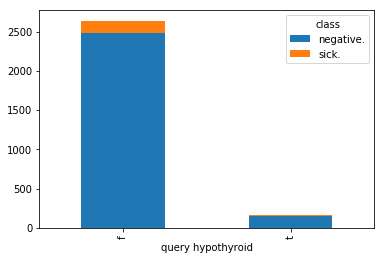

In [119]:
pd.crosstab(index=upraveny['query hypothyroid'], columns=upraveny['class']).plot.bar(stacked=True)

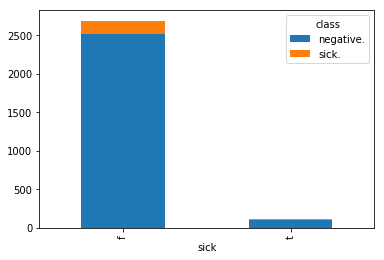

In [120]:
pd.crosstab(index=upraveny['sick'], columns=upraveny['class']).plot.bar(stacked=True)

### Ostatne kategoricke hodnoty porovnane s class

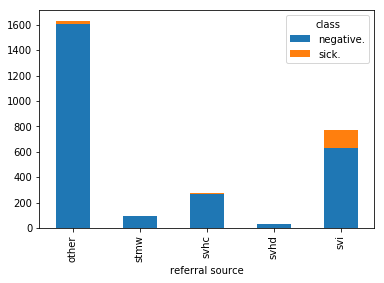

In [121]:
pd.crosstab(index=upraveny['referral source'], columns=upraveny['class']).plot.bar(stacked=True)

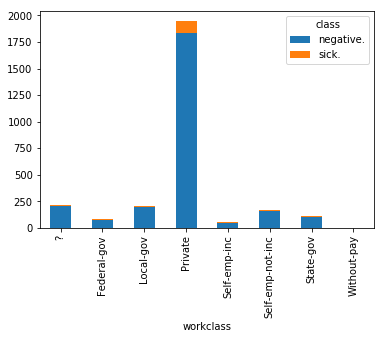

In [122]:
pd.crosstab(index=upraveny['workclass'], columns=upraveny['class']).plot.bar(stacked=True)

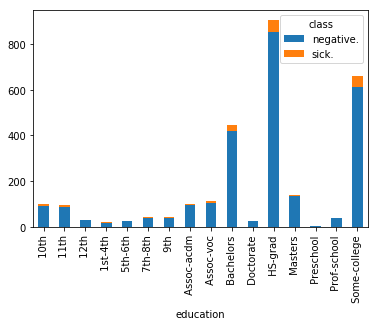

In [123]:
pd.crosstab(index=upraveny['education'], columns=upraveny['class']).plot.bar(stacked=True)

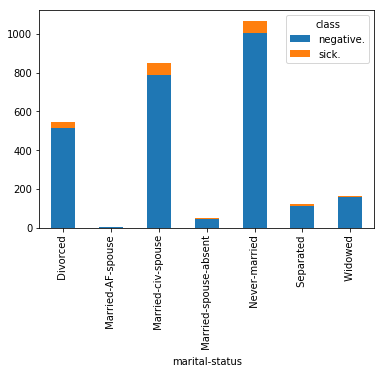

In [124]:
pd.crosstab(index=upraveny['marital-status'], columns=upraveny['class']).plot.bar(stacked=True)

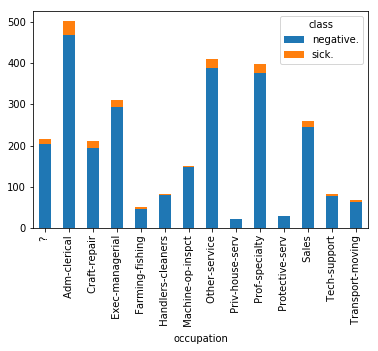

In [125]:
pd.crosstab(index=upraveny['occupation'], columns=upraveny['class']).plot.bar(stacked=True)

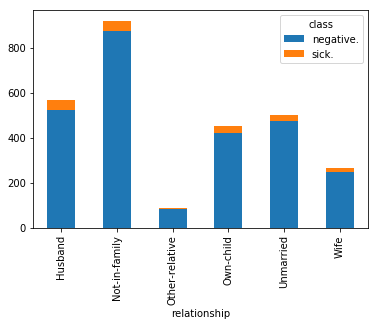

In [126]:
pd.crosstab(index=upraveny['relationship'], columns=upraveny['class']).plot.bar(stacked=True)

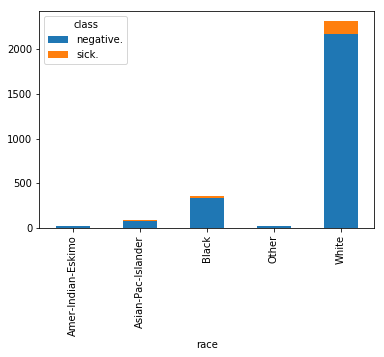

In [127]:
pd.crosstab(index=upraveny['race'], columns=upraveny['class']).plot.bar(stacked=True)

### Class vs "measured" stlpce

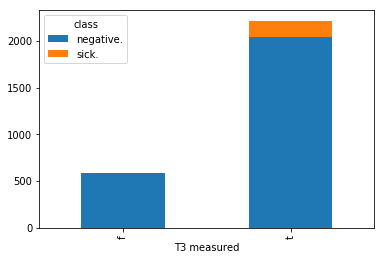

In [128]:
pd.crosstab(index=upraveny['T3 measured'], columns=upraveny['class']).plot.bar(stacked=True)

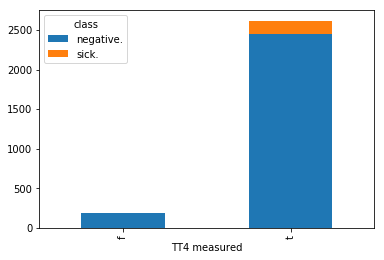

In [129]:
pd.crosstab(index=upraveny['TT4 measured'], columns=upraveny['class']).plot.bar(stacked=True)

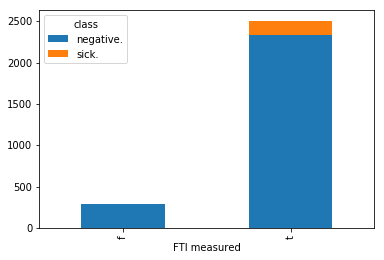

In [130]:
pd.crosstab(index=upraveny['FTI measured'], columns=upraveny['class']).plot.bar(stacked=True)

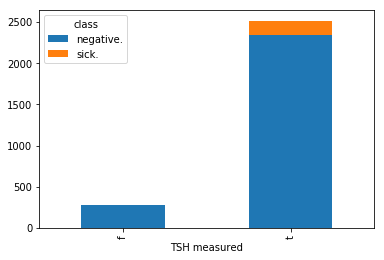

In [131]:
pd.crosstab(index=upraveny['TSH measured'], columns=upraveny['class']).plot.bar(stacked=True)

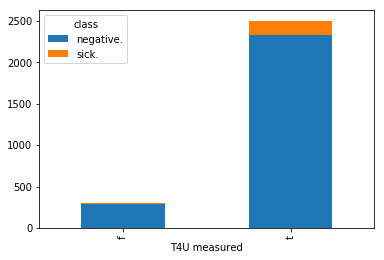

In [132]:
pd.crosstab(index=upraveny['T4U measured'], columns=upraveny['class']).plot.bar(stacked=True)

## Klasifikacne pravidlo

Podla korelacii s triedou class (TSH, TT4, T4U, FTI a T3) sme si vsimli, ze ludia, ktori su chori (sice aj nechori), tak maju hodnoty TSH, TT4, T4U, FTI a T3 nasledovne:

1. TSH < 50
2. TT4 < 200
3. T4U < 1.25 a T4U > 0.5
4. FTI < 230
5. T3 < 2.5

Okrem toho sme zistili, ze vacsina chorych ma okrem toho rasu "White", referral source "svi", workclass "Private" a "pregnant" ma nastaveny na "f"

In [133]:
sick = 0
not_sick = 0

for i,a in upraveny['TSH'].iteritems():
    if(objTT4[i]< 200.0 and 
       objFTI[i] < 230.0 and
       objTSH[i] < 50.0 and
       objT3[i] < 2.5 and
       objT4U[i] > 0.5 and objT4U[i] < 1.25
    and upraveny['race'][i] == 'White'
    and upraveny['referral source'][i] == 'svi'
    and upraveny['workclass'][i] == 'Private'
    and upraveny['pregnant'][i] == 'f'):
        if(upraveny['class'][i] == 'sick.'):
            sick += 1
        else:
            not_sick += 1

In [134]:
upraveny['class'].value_counts()

negative.    2629
sick.         171
Name: class, dtype: int64

In [135]:
real_sick = 0
for a in upraveny['class']:
    if(a == 'sick.'):
        real_sick += 1

In [136]:
sick

81

In [137]:
not_sick

314

In [138]:
#Nasim klasifikacnym pravidlo na zaklade korelacnych grafov sme dokazali toto:

print('SICK = %d' % (sick+not_sick))

print('TP = %d' % sick)
print('FP = %d' % not_sick)

ns = len(upraveny) - (sick+not_sick)

print('NOT SICK = %d' % ns)
print('TN = %d' % (ns - (real_sick-sick)))
print('FN = %d' % (real_sick-sick))


SICK = 395
TP = 81
FP = 314
NOT SICK = 2405
TN = 2315
FN = 90


In [141]:
tp = sick
fp = not_sick
tn = (ns - (real_sick-sick))
fn = (real_sick-sick)

In [142]:
accuracy = (tp+tn)/len(upraveny)
accuracy

0.8557142857142858

In [143]:
precision = tp/(tp+fp)
precision

0.20506329113924052

In [144]:
recall = tp/(tp+fn)
recall

0.47368421052631576

Nasim modelom sme zistili, ze cca 85% dat vieme urcit spravne (tj. ci je pacient sick alebo nie je sick), z toho predpovedat to, ze je sick naozaj vieme iba na 20% a cca 48% pacientom vieme aj spravne urcit, ze naozaj su chori. Model nie je z tohto hladiska dobry, nakolko 52% pacientom nepovieme ze su chori, ked naozaj su chori.